In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import linear_model


In [23]:
data=pd.read_csv("FuelConsumption.csv")

In [24]:
data.head()

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              639 non-null    int64  
 1   MAKE              639 non-null    object 
 2   MODEL             639 non-null    object 
 3   VEHICLE CLASS     639 non-null    object 
 4   ENGINE SIZE       639 non-null    float64
 5   CYLINDERS         639 non-null    int64  
 6   TRANSMISSION      639 non-null    object 
 7   FUEL              639 non-null    object 
 8   FUEL CONSUMPTION  639 non-null    float64
 9   COEMISSIONS       639 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 50.1+ KB


In [26]:
data.describe()

,Year,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
count,639.0,639.000000,639.000000,639.000000,639.000000
mean,2000.0,3.265728,5.805947,14.713615,296.809077
std,0.0,1.231012,1.625588,3.307044,65.504178
min,2000.0,1.000000,3.000000,4.900000,104.000000
25%,2000.0,2.200000,4.000000,12.500000,253.000000
50%,2000.0,3.000000,6.000000,14.400000,288.000000
75%,2000.0,4.300000,6.000000,16.600000,343.000000
max,2000.0,8.000000,12.000000,30.200000,582.000000


In [27]:
cdf=data[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','COEMISSIONS ']]

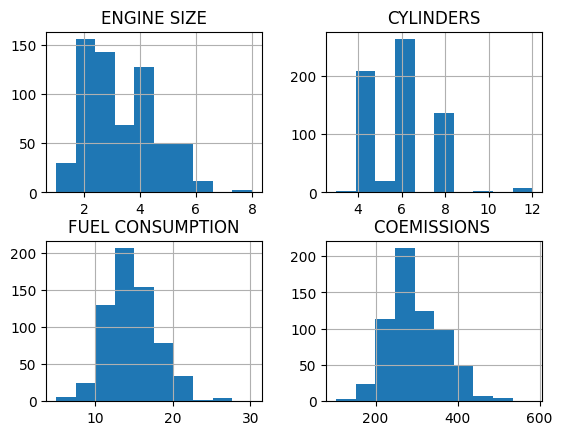

In [28]:
cdf.hist()
plt.show()

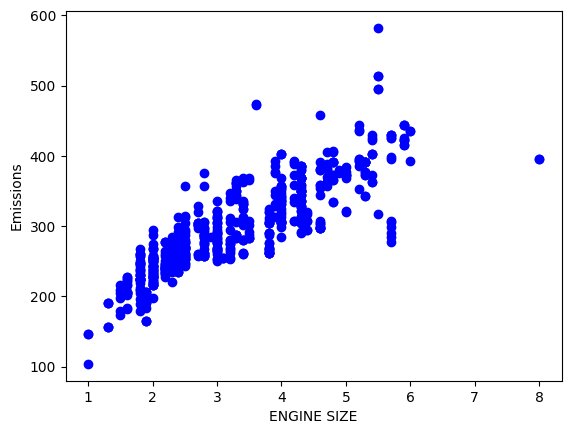

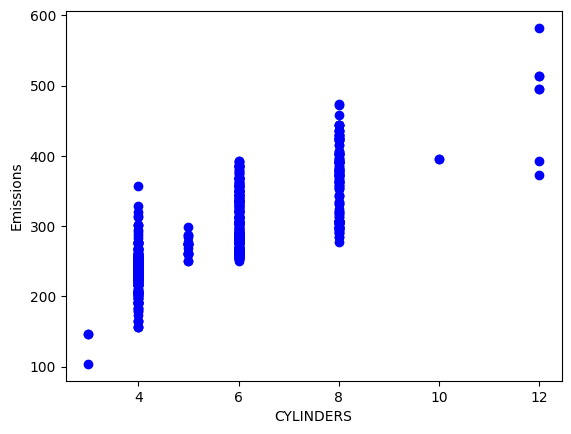

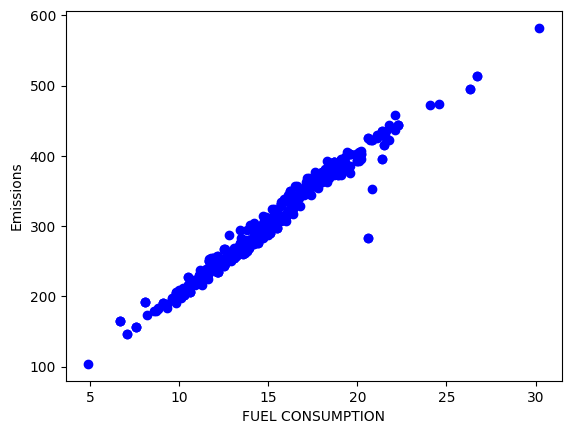

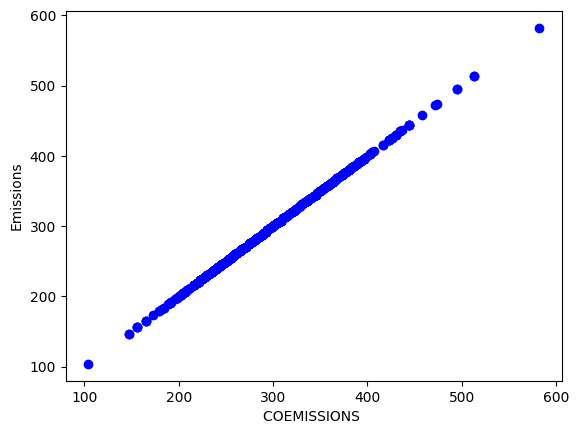

In [29]:
for i in cdf[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','COEMISSIONS ']]:
    plt.scatter(cdf[i],cdf['COEMISSIONS '],color='blue')
    plt.xlabel(i)
    plt.ylabel("Emissions")
    plt.show()

In [30]:
mask=np.random.rand(len(data))<0.80
train=cdf[mask]
test=cdf[~mask]

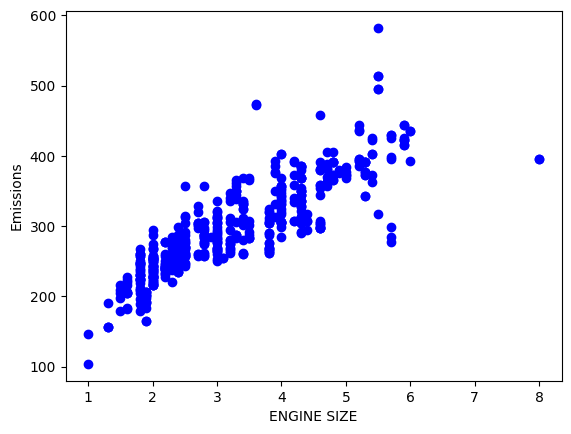

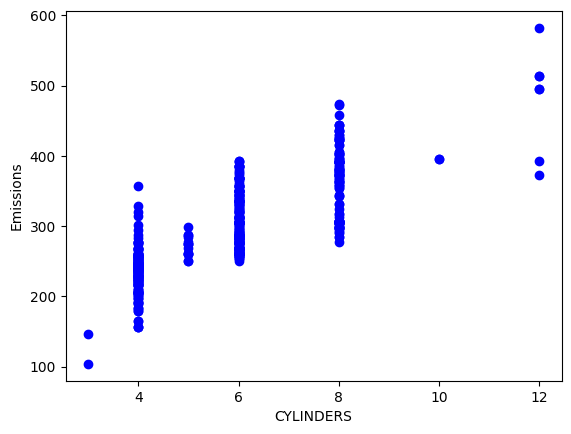

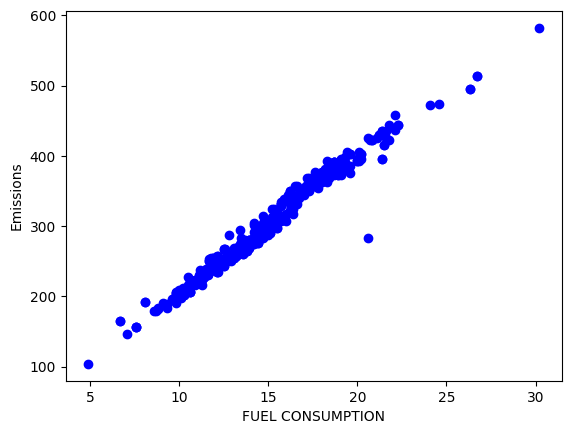

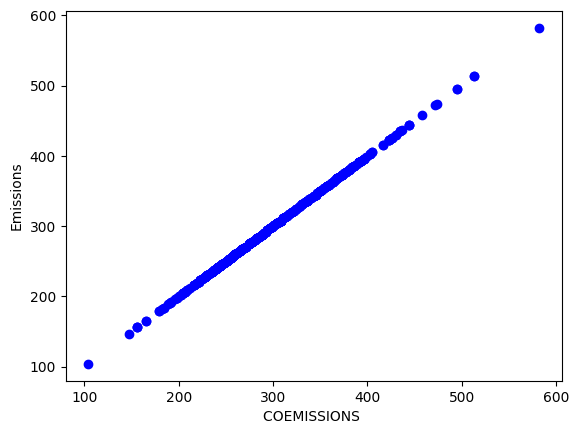

In [31]:
for i in train[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','COEMISSIONS ']]:
    plt.scatter(train[i],train['COEMISSIONS '],color='blue')
    plt.xlabel(i)
    plt.ylabel("Emissions")
    plt.show()

In [32]:
x_train=train[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION']]
y_train=train[['COEMISSIONS ']]

In [33]:
x_test=test[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION']]
y_test=test[['COEMISSIONS ']]

In [34]:
model=LinearRegression().fit(x_train,y_train)
print(model)

LinearRegression()


In [35]:
predictions=model.predict(x_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])
print(model.coef_)
print(model.intercept_)

Predicted labels:  [[220.]
 [298.]
 [286.]
 [304.]
 [260.]
 [260.]
 [309.]
 [297.]
 [306.]
 [310.]]
Actual labels   :      COEMISSIONS 
6            223
15           292
16           288
26           304
38           258
40           258
47           320
54           294
63           290
70           297
[[ 4.26104419 -4.02074252 19.8783607 ]]
[13.98992116]


In [36]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 239.64315761164497
RMSE: 15.480412062075253
R2: 0.9361928869405983


In [37]:
coefficient=[]
intercept=[]
regress_model={}
for i in train[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','COEMISSIONS ']]:
    regr=linear_model.LinearRegression()
    tra_x=np.asanyarray(train[[i]])
    tra_y=np.asanyarray(train[['COEMISSIONS ']])
    regr.fit(tra_x,tra_y)
    regress_model[i]=regr
    print("Relationship between {} & {}".format(i,"COEMISSIONS "))
    print('Coefficients:',regr.coef_)
    print("Intercept:",regr.intercept_)
    coefficient.append(regr.coef_)
    intercept.append(regr.intercept_)
    print("\n")

Relationship between ENGINE SIZE & COEMISSIONS 
Coefficients: [[45.84871385]]
Intercept: [148.065279]


Relationship between CYLINDERS & COEMISSIONS 
Coefficients: [[32.28452487]]
Intercept: [109.70823507]


Relationship between FUEL CONSUMPTION & COEMISSIONS 
Coefficients: [[19.56344297]]
Intercept: [9.12476159]


Relationship between COEMISSIONS  & COEMISSIONS 
Coefficients: [[1.]]
Intercept: [0.]




(517,)
(517,)


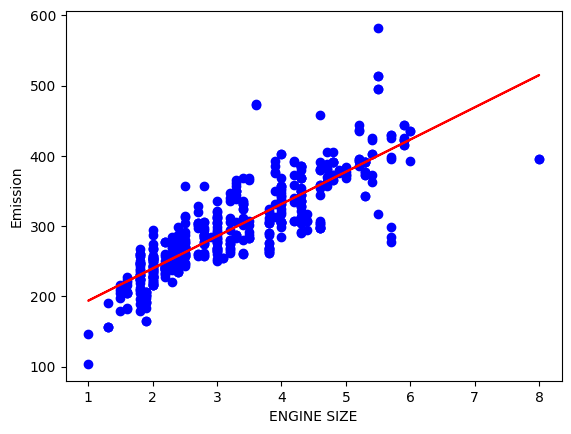

(517,)
(517,)


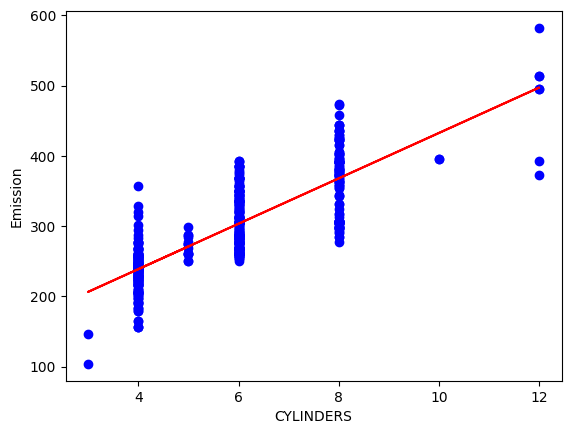

(517,)
(517,)


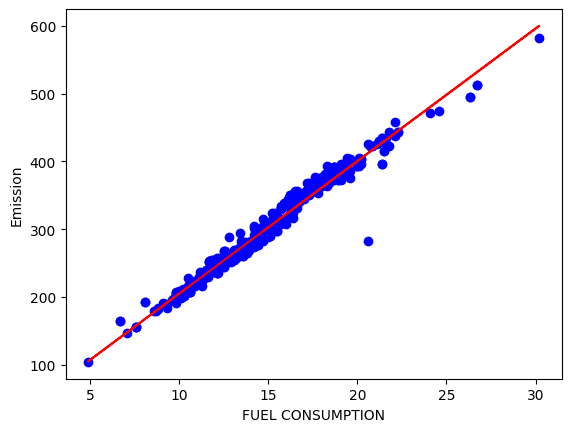

(517,)
(517,)


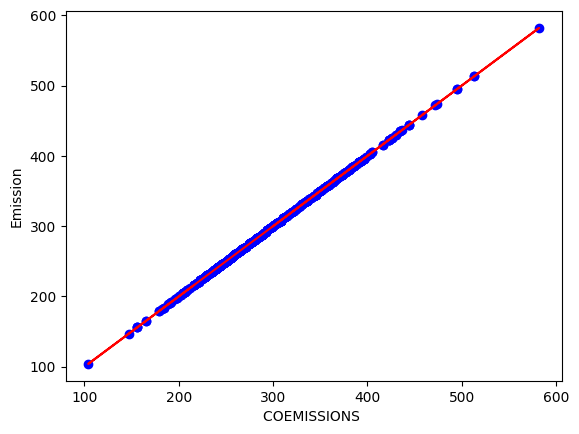

In [38]:
j=0
for i in train[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','COEMISSIONS ']]:
    plt.scatter(train[i],train['COEMISSIONS '], color='blue')
    x=train[i].values
    print(x.shape)
    y=coefficient[j][0]*x + intercept[j]
    print(y.shape)
    l=len(y)
    y=np.reshape(y,(l,))
    plt.plot(x,y,'-r')
    plt.xlabel(i)
    plt.ylabel("Emission")
    plt.show()
    j=j+1

In [39]:
from sklearn.metrics import r2_score
for i in train[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','COEMISSIONS ']]:
    test_x=np.asanyarray(test[[i]])
    test_y=np.asanyarray(test[['COEMISSIONS ']])
    test_y_=regress_model[i].predict(test_x)
    print("Fitting Error Between {} & {}".format(i,'COEMISSIONS '))
    print("Mean Absolute Error:%.2f"%np.mean(np.absolute(test_y_ - test_y)))
    print("Residual sum of squares(MSE):%.2f"%np.mean(np.absolute(test_y_ - test_y)**2))
    print("R2-score:%.2f"%r2_score(test_y_,test_y))
    print("\n")

Fitting Error Between ENGINE SIZE & COEMISSIONS 
Mean Absolute Error:26.21
Residual sum of squares(MSE):1208.06
R2-score:0.60


Fitting Error Between CYLINDERS & COEMISSIONS 
Mean Absolute Error:34.67
Residual sum of squares(MSE):1702.06
R2-score:0.21


Fitting Error Between FUEL CONSUMPTION & COEMISSIONS 
Mean Absolute Error:8.57
Residual sum of squares(MSE):242.55
R2-score:0.93


Fitting Error Between COEMISSIONS  & COEMISSIONS 
Mean Absolute Error:0.00
Residual sum of squares(MSE):0.00
R2-score:1.00


